In [5]:
# This cell is from the template notebook. It contains ipython magic and 
# various useful imports which are commonly used in this app.

%load_ext autoreload
%autoreload 2

import pandas as pd
import datetime
import numpy as np
import os
from acoustic_data_science import config, helpers
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
feather_paths = helpers.get_feather_paths(config.processed_data_path + '/monthly_data')
feather_paths

['/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/monthly_data/2018_08.feather',
 '/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/monthly_data/2018_09.feather',
 '/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/monthly_data/2018_10.feather',
 '/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/monthly_data/2018_11.feather',
 '/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/monthly_data/2018_12.feather',
 '/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/monthly_data/2019_01.feather',
 '/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/monthly_data/2019_02.feather',
 '/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/monthly_data/2019_03.feather',
 '/Users/georgeamccarthy/Documents/workspace/mph

In [7]:
df_generator = (pd.read_feather(feather_path, columns=['timestamp', 'broadband_spl', 'background_spl']) for feather_path in feather_paths)
df = pd.concat(df_generator, ignore_index=True)
#df.to_feather(path=os.path.join(config.processed_data_path, 'whole_year', 'whole_year.feather'))

In [8]:
df

,timestamp,broadband_spl,background_spl
0,2018-08-02 00:08:03.500,-57.607837,-56.670380
1,2018-08-02 00:08:04.000,-57.849402,-56.669828
2,2018-08-02 00:08:04.500,-58.041780,-56.669340
3,2018-08-02 00:08:05.000,-57.718385,-56.668625
4,2018-08-02 00:08:05.500,-57.395894,-56.667946
...,...,...,...
30048620,2019-05-31 22:57:28.007,-55.031424,-63.653202
30048621,2019-05-31 22:57:28.507,-49.616213,-63.635780
30048622,2019-05-31 22:57:29.007,-49.719039,-63.618844
30048623,2019-05-31 22:57:29.507,-48.590468,-63.600810


In [9]:
df = pd.read_feather(config.processed_data_path + '/whole_year/whole_year.feather')
df

,timestamp,broadband_spl,background_spl
0,2018-08-02 00:08:03.500,-57.607837,-56.670380
1,2018-08-02 00:08:04.000,-57.849402,-56.669828
2,2018-08-02 00:08:04.500,-58.041780,-56.669340
3,2018-08-02 00:08:05.000,-57.718385,-56.668625
4,2018-08-02 00:08:05.500,-57.395894,-56.667946
...,...,...,...
30048620,2019-05-31 22:57:28.007,-55.031424,-63.653202
30048621,2019-05-31 22:57:28.507,-49.616213,-63.635780
30048622,2019-05-31 22:57:29.007,-49.719039,-63.618844
30048623,2019-05-31 22:57:29.507,-48.590468,-63.600810


In [13]:
monthly_spl_df = df.groupby(pd.Grouper(key="timestamp", freq='1M'), as_index=True).mean().drop(columns=["background_spl"]).reset_index()
monthly_spl_df['month'] = monthly_spl_df['timestamp'].dt.strftime('%Y-%m')
monthly_spl_df

,timestamp,broadband_spl,month
0,2018-08-31,-59.240210,2018-08
1,2018-09-30,-50.645967,2018-09
2,2018-10-31,-62.259018,2018-10
3,2018-11-30,-68.445523,2018-11
4,2018-12-31,-63.118367,2018-12
5,2019-01-31,-63.728790,2019-01
6,2019-02-28,-63.805904,2019-02
7,2019-03-31,-63.021809,2019-03
8,2019-04-30,-64.615025,2019-04
9,2019-05-31,-64.759774,2019-05


Open water loudness (August & September)

In [19]:
monthly_spl_df[(monthly_spl_df["timestamp"].dt.month == 8) | (monthly_spl_df["timestamp"].dt.month == 9)]["broadband_spl"].mean()

-54.9430884230642

Freeze-up loudness (October & November)

In [20]:
monthly_spl_df[(monthly_spl_df["timestamp"].dt.month == 10) | (monthly_spl_df["timestamp"].dt.month == 11)]["broadband_spl"].mean()

-65.35227045412012

Ice cover loudness (December 2018 - May 2019)

In [21]:
monthly_spl_df[(monthly_spl_df["timestamp"].dt.month == 12) | (monthly_spl_df["timestamp"].dt.year == 2019)]["broadband_spl"].mean()

-63.84161149828148

In [51]:
print(monthly_spl_df["broadband_spl"].mean())
print(monthly_spl_df["broadband_spl"].std())
monthly_spl_df["diff"] = (monthly_spl_df["broadband_spl"] - monthly_spl_df["broadband_spl"].mean()).abs()
(monthly_spl_df["broadband_spl"] - monthly_spl_df["broadband_spl"].mean()).abs() < (monthly_spl_df["broadband_spl"].std())

-62.364038674405755
4.7118842858526095


0     True
1    False
2     True
3    False
4     True
5     True
6     True
7     True
8     True
9     True
Name: broadband_spl, dtype: bool

In [49]:
monthly_spl_df

,timestamp,broadband_spl,diff,2sd
0,2018-08,-59.240210,3.123828,-124.728077
1,2018-09,-50.645967,11.718072,-124.728077
2,2018-10,-62.259018,0.105021,-124.728077
3,2018-11,-68.445523,6.081484,-124.728077
4,2018-12,-63.118367,0.754328,-124.728077
5,2019-01,-63.728790,1.364751,-124.728077
6,2019-02,-63.805904,1.441865,-124.728077
7,2019-03,-63.021809,0.657771,-124.728077
8,2019-04,-64.615025,2.250986,-124.728077
9,2019-05,-64.759774,2.395736,-124.728077


2021-12-19 18:36:11,076 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-12-19 18:36:11,077 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


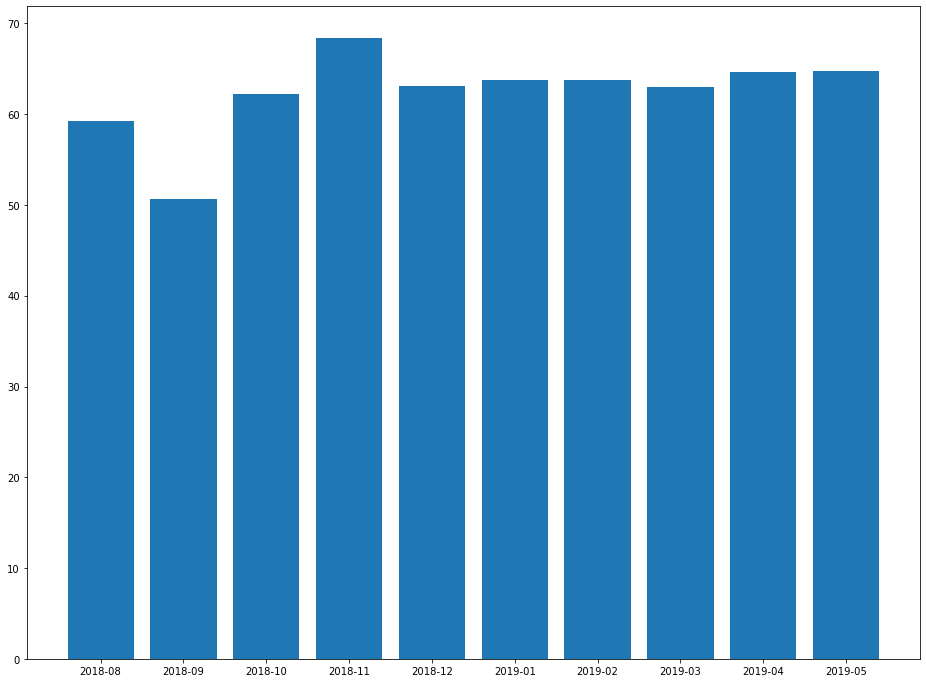

In [26]:
plt.figure(figsize=(16,12))
t = monthly_spl_df['timestamp']
y = -monthly_spl_df['broadband_spl']
plt.bar(t, y)
plt.show()

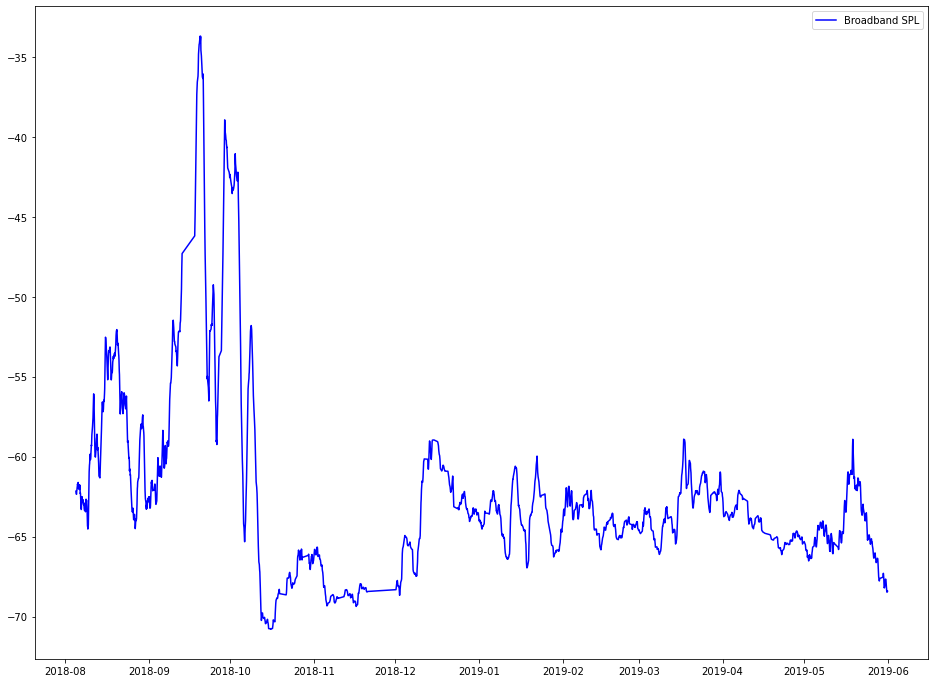

In [47]:
averaging_window = 2 * 60 * 60 * 24 * 2
rolling_mean = df['broadband_spl'].rolling(averaging_window).mean()
rolling_mean_not_null = rolling_mean.notnull()
rolling_mean = rolling_mean[rolling_mean_not_null]

plt.figure(figsize=(16,12))

step = 10000

t = df['timestamp'][rolling_mean_not_null]
y = rolling_mean
plt.plot(t[::step], y[::step], 'b-', label='Broadband SPL')

plt.legend()
plt.show()